In [1]:
from demo import *
import utils
from nltk.corpus import wordnet as wn
from pattern.en import conjugate, PAST, PRESENT, SINGULAR
import json
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
from pattern.en import conjugate, lemma, lexeme

# 1. Active Passive

## 1.1 Statistics

In [6]:
transitives = utils.read_words("./input/transitive_verbs.txt")
add_verbs = utils.read_words("./input/predicate_verb_add.txt")
dataset_tp =  utils.read_json_file("./output/two_person_relationships.txt")

close file...


In [7]:
ts_verb_count = {}
add_verb_count = {}
captions = {}
for image in dataset_tp:
    img_id = image["image_id"]
    sub, obj, predicate = image['subject_name'], image['object_name'], image["predicate"]
    active_pre = utils.verb_active_voice(predicate)
    caption = sub + " " + active_pre + " " + obj 
    if img_id in captions and captions[img_id] == caption:
        continue
    elif img_id not in captions:
        captions[img_id] = caption
    else:
        print(img_id)
        print(captions[img_id])
        print(caption)
    verb = lemma(predicate.split()[0])
    if verb in transitives:
        if verb in ts_verb_count:
            ts_verb_count[verb] += 1
        else:
            ts_verb_count[verb] = 1
    else:
        if verb in add_verb_count:
            add_verb_count[verb] += 1
        else:
            add_verb_count[verb] = 1

414
woman reads to girl
woman reads to a girl
1378
woman holds baby
lady carries baby
3256
girl holds woman
woman holds girl
285606
man watches girl
woman watches girl
285713
woman pulls boy
adult helps child
285808
man holds child
man carries child
285849
woman holds a baby
man carries baby
498369
mother holds her baby
woman holds child
498369
mother holds her baby
woman holds child
498369
mother holds her baby
woman holds child
713225
woman watches woman
man watches woman
713501
woman holds child
man watches skateboarder
1159470
woman shows girl
woman shows teddy bear to girl
1592378
man attends to toddler
man serves woman
1592769
woman carries child
lady holds baby
1592769
woman carries child
woman carries baby
1592769
woman carries child
woman holds baby
1592923
man holds child
man carries baby
1593147
man sides child
woman sides child
2411906
man has a baby
man holds son
2411257
woman holds baby
woman carries baby
2411157
man holds child
man holds boy
2410191
boy watches boy
skate

In [8]:
print("vocabulary length: ", len(ts_verb_count))
print("sum: ", sum(ts_verb_count.values()))
sorted(ts_verb_count.items(), key=lambda x: x[1], reverse=True)

vocabulary length:  21
sum:  525


[('watch', 283),
 ('carry', 78),
 ('help', 68),
 ('teach', 21),
 ('lean', 19),
 ('kiss', 16),
 ('embrace', 6),
 ('follow', 6),
 ('grab', 4),
 ('try', 4),
 ('dress', 3),
 ('run', 3),
 ('bend', 3),
 ('chase', 2),
 ('lead', 2),
 ('brush', 2),
 ('inspect', 1),
 ('wash', 1),
 ('protect', 1),
 ('interest', 1),
 ('marry', 1)]

In [10]:
print("extra verbs vocabulary length: ", len(add_verb_count))
print("sum: ", sum(add_verb_count.values()))
sorted(add_verb_count.items(), key=lambda x: x[1], reverse=True)

extra verbs vocabulary length:  145
sum:  1134


[('hold', 428),
 ('look', 110),
 ('stand', 37),
 ('have', 34),
 ('hug', 30),
 ('fee', 29),
 ('sit', 26),
 ('wear', 25),
 ('smile', 21),
 ('walk', 19),
 ('touch', 19),
 ('play', 17),
 ('face', 16),
 ('take', 14),
 ('on', 13),
 ('be', 11),
 ('show', 10),
 ('push', 9),
 ('point', 8),
 ('read', 7),
 ('in', 7),
 ('block', 7),
 ('of', 7),
 ('pull', 6),
 ('over', 6),
 ('observe', 6),
 ('layer', 6),
 ('a', 5),
 ('side', 5),
 ('taller', 5),
 ('feed', 5),
 ('below', 5),
 ('record', 4),
 ('talk', 4),
 ('not', 4),
 ('photograph', 4),
 ('give', 4),
 ('stare', 4),
 ('film', 4),
 ('pose', 4),
 ('speak', 4),
 ('ride', 4),
 ('lift', 3),
 ('wait', 3),
 ('hand', 3),
 ('reach', 3),
 ('huge', 3),
 ('jump', 3),
 ('defend', 3),
 ('visit', 3),
 ('baptize', 2),
 ('attend', 2),
 ('serve', 2),
 ('tag', 2),
 ('fight', 2),
 ('assist', 2),
 ('support', 2),
 ('put', 2),
 ('see', 2),
 ('around', 2),
 ('kneel', 2),
 ('gaze', 2),
 ('ski', 2),
 ('hunch', 2),
 ('work', 2),
 ('high', 2),
 ('match', 2),
 ('train', 2),
 ('l

## 1.2 Constructed Examples

In [13]:
samples = utils.read_json_file("./output/active_passive_captions.txt")

close file...


In [16]:
def get_img_path(img_id):
    VG_100K_path = "./VG_100K/" + str(img_id) + ".jpg"
    VG_100K_2_path = "./VG_100K_2/" + str(img_id) + ".jpg"
    if os.path.exists(VG_100K_path):
        return VG_100K_path
    elif os.path.exists(VG_100K_2_path):
        return VG_100K_2_path
    else:
        return None
def show_image(img_path):
    if img_path == None:
        return
    image = Image.open(img_path).convert("RGB")
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    return image

def show_samples(samples):
    start_index = np.random.randint(len(samples) - 10)
    for sample in samples[start_index:start_index+10]:
        img_id = sample['image_id']
        show_image(get_img_path(img_id))
        print(img_id)
        print("True1: ", sample['True1'])
        print("True2: ",sample['True2'])
        print("False1: ", sample['False1'])
        print("False2: ", sample['False2'])

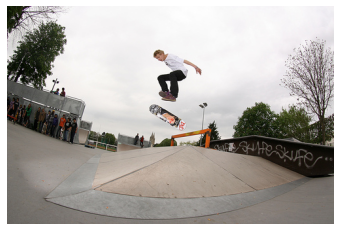

2353622
True1:  spectators watches skateboarder
True2:  skateboarder is watched by spectators
False1:  skateboarder watches spectators
False2:  spectators is watched by skateboarder


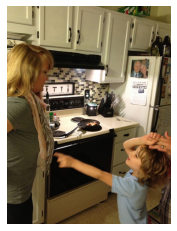

2353545
True1:  child points at woman
True2:  woman is pointed at by child
False1:  woman points at child
False2:  child is pointed at by woman


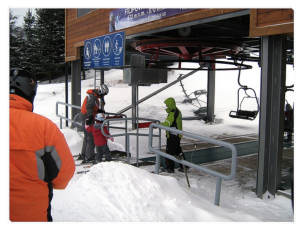

2353511
True1:  man holds boy
True2:  boy is held by man
False1:  boy holds man
False2:  man is held by boy


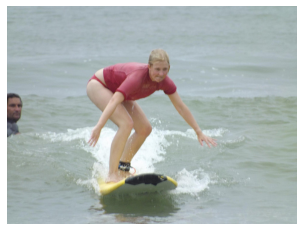

2353355
True1:  man watches girl
True2:  girl is watched by man
False1:  girl watches man
False2:  man is watched by girl


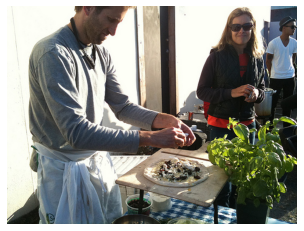

2353193
True1:  woman watches man
True2:  man is watched by woman
False1:  man watches woman
False2:  woman is watched by man


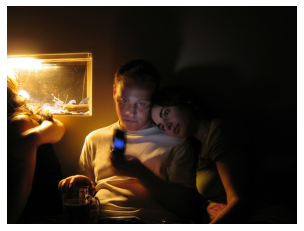

2353129
True1:  woman leans on man
True2:  man is leant on by woman
False1:  man leans on woman
False2:  woman is leant on by man


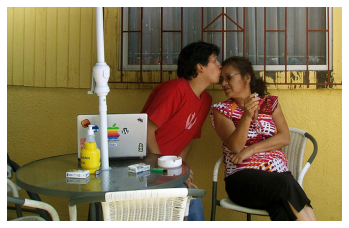

2353018
True1:  man kisses woman
True2:  woman is kissed by man
False1:  woman kisses man
False2:  man is kissed by woman


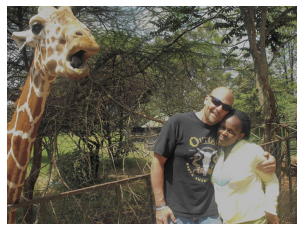

2352950
True1:  man holds woman
True2:  woman is held by man
False1:  woman holds man
False2:  man is held by woman


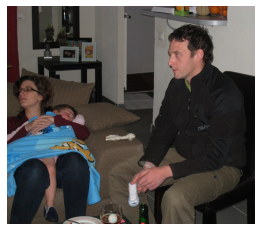

2352875
True1:  woman holds boy
True2:  boy is held by woman
False1:  boy holds woman
False2:  woman is held by boy


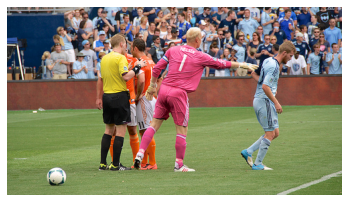

2352829
True1:  goalie reaches towards player
True2:  player is reached towards by goalie
False1:  player reaches towards goalie
False2:  goalie is reached towards by player


In [17]:
show_samples(samples)

# Coodination

In [17]:
images = utils.read_json_file('/Users/xinyichen/Desktop/Thesis/Dataset_Construction/output/co_image_captions.json')

close file...


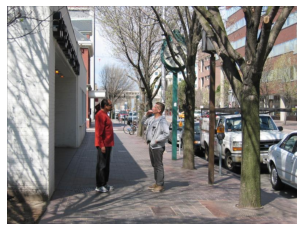

1
True1:  man wears sneakers and has shirt
True2:  man has shoes and jacket
False1:  man wears sneakers and has shoes
False2:  man has shirt and jacket


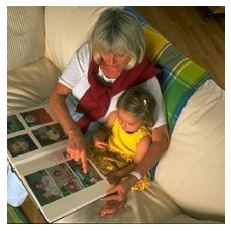

21
True1:  woman has hair and wearing watch
True2:  girl next to adult and wearing yellow
False1:  woman has hair and next to adult
False2:  girl wearing watch and yellow


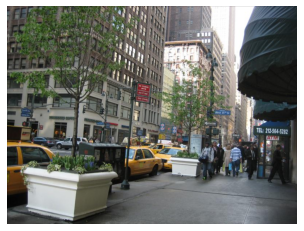

48
True1:  man wears sweatshirt and carries gym bag
True2:  man wears shirt and carries shopping bag
False1:  man wears sweatshirt and shirt
False2:  man carries gym bag and shopping bag


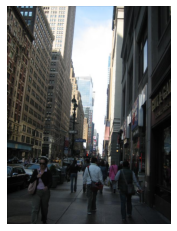

49
True1:  man wearing jacket and has bag
True2:  woman carrying bag and has a purse
False1:  man wearing jacket and carrying bag
False2:  woman has bag and has a purse


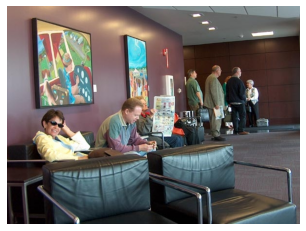

70
True1:  woman wearing shirt and sunglasses
True2:  man wearing jacket and standing behind man
False1:  woman wearing shirt and jacket
False2:  man wearing sunglasses and standing behind man


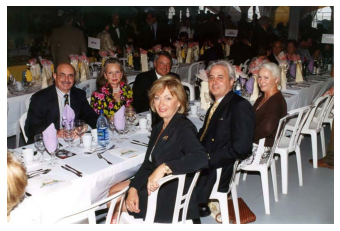

73
True1:  man wearing suit and glasses
True2:  woman sitting in chair and wearing necklace
False1:  man wearing suit and sitting in chair
False2:  woman wearing glasses and necklace


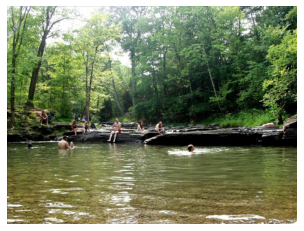

87
True1:  man wears shorts and wearing shorts
True2:  woman sits on rock and wearing swimsuit
False1:  man wears shorts and sits on rock
False2:  woman wearing shorts and swimsuit


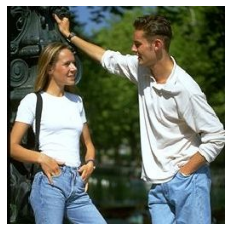

114
True1:  woman has nose and wearing jeans
True2:  man wearing jeans and talking to woman
False1:  woman has nose and wearing jeans
False2:  man wearing jeans and talking to woman


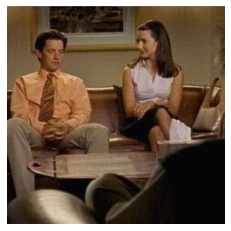

115
True1:  man has a neck tie and has right eye
True2:  woman wearing a blouse and has left hand
False1:  man has a neck tie and wearing a blouse
False2:  woman has right eye and left hand


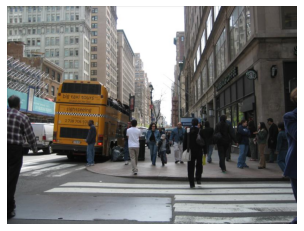

126
True1:  man wearing shirt and walking on street
True2:  man wearing t-shirt and pants
False1:  man wearing shirt and t-shirt
False2:  man walking on street and wearing pants


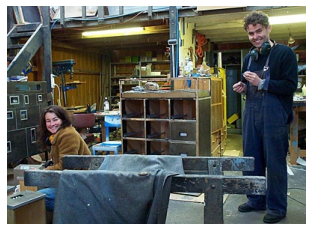

167
True1:  man wearing overalls and headphones
True2:  woman has hair and wearing coat
False1:  man wearing overalls and has hair
False2:  woman wearing headphones and coat


In [18]:
i = 0
for img_id, sample in images.items():
    if i > 10:
        break
    i += 1
    show_image(get_img_path(img_id))
    print(img_id)
    print("True1: ", sample['True1'])
    print("True2: ",sample['True2'])
    print("False1: ", sample['False1'])
    print("False2: ", sample['False2'])